# Hyperparameter Optimization Of TemporalFusionTransformer

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from autogluon.timeseries import TimeSeriesPredictor, TimeSeriesDataFrame

In [2]:
# Load data of closing transaction
df = pd.read_csv('../CSV/df_TS_week.csv')
df.head()

,item_id,timestamp,target,ACT01,ACT03,ACT04,ACT07,ACT09,ACT13,ACT15,ACT17,ACT32,ACT44
0,FR13,2019-12-30,7663.0,1267.0,299.0,0.0,2108.0,189.0,84.0,0.0,0.0,3716.0,0.0
1,FR13,2020-01-06,2917.0,1052.0,490.0,2.0,103.0,255.0,191.0,3.0,0.0,821.0,0.0
2,FR13,2020-01-13,2341.0,846.0,115.0,0.0,280.0,69.0,66.0,416.0,407.0,142.0,0.0
3,FR13,2020-01-20,3853.0,1350.0,932.0,44.0,568.0,297.0,278.0,81.0,80.0,223.0,0.0
4,FR13,2020-01-27,82251.0,1871.0,863.0,0.0,609.0,363.0,219.0,2.0,0.0,19393.0,58931.0


In [3]:
# Create a new df of the item_id equal to IT01 
df_IT = df[df['item_id'] == 'IT01']
print(df_IT.shape)

(172, 13)


In [4]:
# Drop ACT04 column
df_IT = df_IT.drop(columns=['ACT04'])

In [5]:
# Split data into training and testing set; train set based on timestamp from 2020-01-01 to 2022-04-30 and test set based on timestamp from 2022-05-01 to 2023-04-30
train_data = df_IT[df_IT['timestamp'] <= '2022-04-30']
test_data = df_IT[df_IT['timestamp'] > '2022-04-30']

# Calculate the percentage of the training set and testing set
print(train_data.shape[0] / df_IT.shape[0])
print(test_data.shape[0] / df_IT.shape[0])

0.6976744186046512
0.3023255813953488


In [6]:
# Convert train_data to TimeSeriesDataFrame
train_data = TimeSeriesDataFrame(
    train_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

train_data.head()

target   ACT01  ACT03  ACT07  ACT09  ACT13   ACT15  \
item_id timestamp                                                        
IT01    2019-12-30  7613.0  1228.0   87.0  195.0  188.0   32.0  1817.0   
        2020-01-06   390.0    87.0   63.0    5.0    8.0    0.0     0.0   
        2020-01-13   702.0   161.0   10.0   14.0    0.0   49.0     1.0   
        2020-01-20   941.0   437.0  143.0   86.0   67.0  110.0     0.0   
        2020-01-27  1470.0   403.0  457.0  178.0  108.0   48.0     7.0   

                     ACT17   ACT32  ACT44  
item_id timestamp                          
IT01    2019-12-30  1255.0  2811.0    0.0  
        2020-01-06     0.0   227.0    0.0  
        2020-01-13     0.0   467.0    0.0  
        2020-01-20     0.0    98.0    0.0  
        2020-01-27     0.0   269.0    0.0

In [7]:
# Convert test_data to TimeSeriesDataFrame
test_data = TimeSeriesDataFrame(
    test_data, 
    id_column="item_id",
    timestamp_column="timestamp"
    
)

test_data.head()

target  ACT01  ACT03  ACT07  ACT09  ACT13  ACT15  ACT17  \
item_id timestamp                                                             
IT01    2022-05-02  4074.0  788.0   29.0  396.0   30.0  111.0  515.0  145.0   
        2022-05-09   756.0  137.0    0.0  124.0    0.0    0.0    0.0    0.0   
        2022-05-16   439.0  153.0   27.0   76.0    2.0   24.0    0.0    0.0   
        2022-05-23  2078.0  452.0   28.0  387.0   57.0  158.0  506.0  138.0   
        2022-05-30  3883.0  912.0  198.0  514.0  178.0  261.0   14.0   10.0   

                     ACT32  ACT44  
item_id timestamp                  
IT01    2022-05-02  2060.0    0.0  
        2022-05-09   495.0    0.0  
        2022-05-16   157.0    0.0  
        2022-05-23   352.0    0.0  
        2022-05-30  1796.0    0.0

In [8]:
# Build predictor
predictor = TimeSeriesPredictor(
    prediction_length=12,
    freq='W-MON',
    target='target',
    path='C:\\Develop\\HPO\\TemporalFusionTransformer',
    eval_metric='MASE'
)

In [9]:
from autogluon.common import space

# Fit the model
predictor.fit(
    train_data,
    hyperparameters = {
        "TemporalFusionTransformer": {
           #"hidden_dim": space.Categorical(32, 64, 128),  
           #"variable_dim": space.Categorical(32, 64, 128),
           #"num_heads": space.Int(2,8),
           "dropout_rate": space.Real(0.1, 0.9),
           "max_epochs": space.Categorical(100, 150, 200),
           "batch_size": space.Categorical(64, 128, 256),
           "lr": space.Categorical(0.01, 0.001, 0.0001, 0.00001),
           "early_stopping_patience" : 10
        },
    },
    hyperparameter_tune_kwargs="auto",
    refit_full=True,
    num_val_windows=3,
    random_seed=42
)

Loading: C:\Develop\HPO\TemporalFusionTransformer\models\TemporalFusionTransformer\cc21ccea\model.pkl
Loading: C:\Develop\HPO\TemporalFusionTransformer\models\TemporalFusionTransformer\cc21ccea\W2\model.pkl
Loading: C:\Develop\HPO\TemporalFusionTransformer\models\TemporalFusionTransformer\639a8e86\model.pkl
Loading: C:\Develop\HPO\TemporalFusionTransformer\models\TemporalFusionTransformer\639a8e86\W2\model.pkl
Loading: C:\Develop\HPO\TemporalFusionTransformer\models\TemporalFusionTransformer\793d836d\model.pkl
Loading: C:\Develop\HPO\TemporalFusionTransformer\models\TemporalFusionTransformer\793d836d\W2\model.pkl
Loading: C:\Develop\HPO\TemporalFusionTransformer\models\TemporalFusionTransformer\9c1748bc\model.pkl
Loading: C:\Develop\HPO\TemporalFusionTransformer\models\TemporalFusionTransformer\9c1748bc\W2\model.pkl
Loading: C:\Develop\HPO\TemporalFusionTransformer\models\TemporalFusionTransformer\a056d09e\model.pkl
Loading: C:\Develop\HPO\TemporalFusionTransformer\models\TemporalFusio

In [10]:
# Make prediction on training data
predictions = predictor.predict(train_data, random_seed=42)
predictions.head()

Setting random seed to 42
data with frequency 'None' has been resampled to frequency 'W-MON'.
data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble_FULL
Found no cached predictions
Prediction order: ['TemporalFusionTransformer\\793d836d_FULL', 'TemporalFusionTransformer\\bdd7a609_FULL', 'TemporalFusionTransformer\\0b146e31_FULL', 'TemporalFusionTransformer\\9c1748bc_FULL', 'TemporalFusionTransformer\\7d9eb9c3_FULL', 'WeightedEnsemble_FULL']
Loading: C:\Develop\HPO\TemporalFusionTransformer\models\TemporalFusionTransformer\793d836d\TemporalFusionTransformer\793d836d\TemporalFusionTransformer\793d836d_FULL\model.pkl
Predicting with model TemporalFusionTransformer\793d836d_FULL
Loading: C:\Develop\HPO\TemporalFusionTransformer\models\TemporalFusionTransformer\bdd7a609\TemporalFusionTransformer\bdd7a609\TemporalFusionTra

mean          0.1          0.2          0.3  \
item_id timestamp                                                        
IT01    2022-05-02  3502.782227  2409.011963  2609.975830  3012.983398   
        2022-05-09   946.039246   163.358612   456.205414   600.405212   
        2022-05-16  1163.192871   385.592133   668.671265   817.247437   
        2022-05-23  1205.553711   430.506866   706.838745   855.063354   
        2022-05-30  3580.957031  2522.491943  2712.377686  3048.798096   

                            0.4          0.5          0.6          0.7  \
item_id timestamp                                                        
IT01    2022-05-02  3270.700439  3502.782227  3777.349121  3995.510254   
        2022-05-09   807.330872   946.039246  1238.497803  1526.570801   
        2022-05-16  1021.130249  1163.192871  1405.658447  1657.126465   
        2022-05-23  1078.958740  1205.553711  1427.122803  1646.711060   
        2022-05-30  3276.524414  3580.957031  3889.316650  4096.775391   

                            0.8          0.9  
item_id timestamp                             
IT01    2022-05-02  4386.358398  4865.654785  
        2022-05-09  1941.236450  2310.382080  
        2022-05-16  2099.893555  2417.969482  
        2022-05-23  2104.691406  2408.708496  
        2022-05-30  4511.583496  4970.310547

In [11]:
predictor.leaderboard(test_data)

Generating leaderboard for all models trained
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Loading: C:\Develop\HPO\TemporalFusionTransformer\models\cached_predictions.pkl
Found no cached predictions
Prediction order: ['TemporalFusionTransformer\\7d9eb9c3', 'TemporalFusionTransformer\\793d836d', 'TemporalFusionTransformer\\bdd7a609', 'TemporalFusionTransformer\\9c1748bc_FULL', 'TemporalFusionTransformer\\cc21ccea_FULL', 'TemporalFusionTransformer\\a056d09e', 'TemporalFusionTransformer\\a056d09e_FULL', 'TemporalFusionTransformer\\cc21ccea', 'TemporalFusionTransformer\\793d836d_FULL', 'TemporalFusionTransformer\\0b146e31_FULL', 'TemporalFusionTransformer\\23b3b991_FULL', 'TemporalFusionTransformer\\639a8e86_FULL', 'TemporalFusionTransformer\\0b146e31', 'TemporalFusionTransformer\\7d9eb9c3_FULL', 'TemporalFusionTransformer\\7931a1bc', 'TemporalFusionTransformer\\9c1748bc', 'TemporalFusionTransformer\\bdd7

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,TemporalFusionTransformer\cc21ccea_FULL,-0.233654,NaN,0.095774,NaN,299.498524,12
1,TemporalFusionTransformer\cc21ccea,-0.233654,-0.726310,0.081670,0.062489,933.318608,1
2,TemporalFusionTransformer\bdd7a609_FULL,-0.279175,NaN,0.073499,NaN,977.797090,18
3,TemporalFusionTransformer\bdd7a609,-0.279175,-0.756986,0.076573,0.050051,2201.542159,7
4,TemporalFusionTransformer\0b146e31_FULL,-0.313481,NaN,0.067514,NaN,526.561409,21
5,TemporalFusionTransformer\0b146e31,-0.313481,-0.745433,0.073565,0.031265,1757.625243,10
6,TemporalFusionTransformer\793d836d_FULL,-0.331287,NaN,0.074628,NaN,857.239822,14
7,TemporalFusionTransformer\793d836d,-0.331287,-0.712430,0.081619,0.039860,3032.444811,3
8,WeightedEnsemble_FULL,-0.347264,NaN,0.374745,NaN,6.258288,22
9,WeightedEnsemble,-0.347264,-0.632790,0.400096,0.181231,6.258288,11


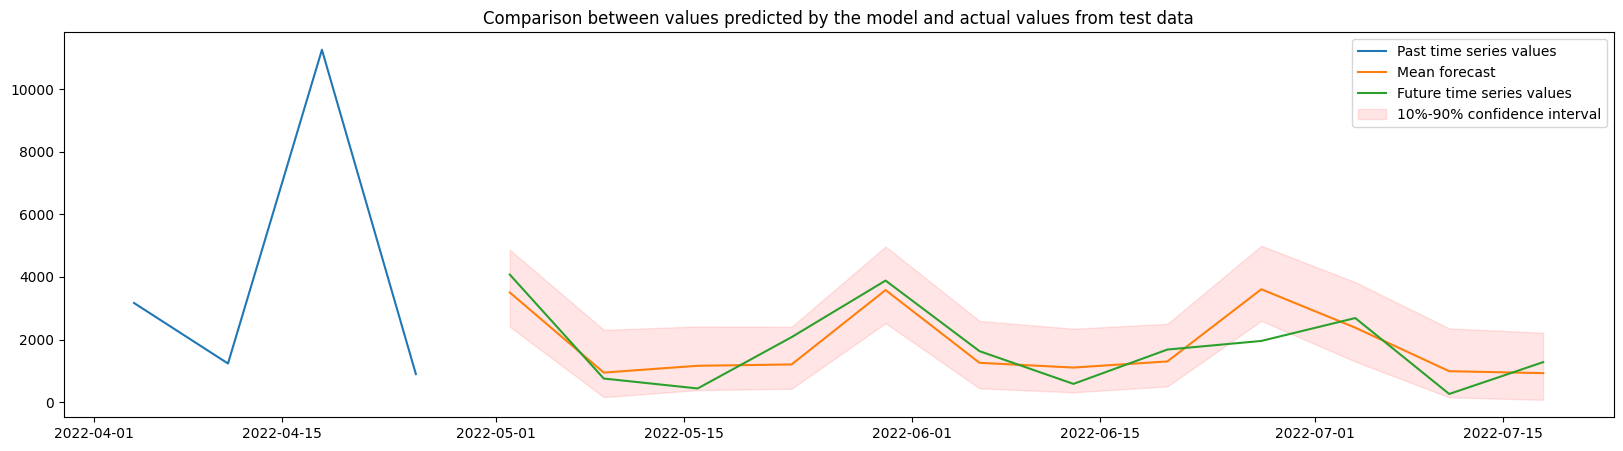

In [12]:
plt.figure(figsize=(20, 5))
plt.title("Comparison between values predicted by the model and actual values from test data")

item_id = "IT01"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"][:12]

plt.plot(y_past[-4:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend()

In [13]:
# Print all row of predictions where item_id is IT01
predictions.loc['IT01']

,mean,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
timestamp,,,,,,,,,,
2022-05-02,3502.782227,2409.011963,2609.975830,3012.983398,3270.700439,3502.782227,3777.349121,3995.510254,4386.358398,4865.654785
2022-05-09,946.039246,163.358612,456.205414,600.405212,807.330872,946.039246,1238.497803,1526.570801,1941.236450,2310.382080
2022-05-16,1163.192871,385.592133,668.671265,817.247437,1021.130249,1163.192871,1405.658447,1657.126465,2099.893555,2417.969482
2022-05-23,1205.553711,430.506866,706.838745,855.063354,1078.958740,1205.553711,1427.122803,1646.711060,2104.691406,2408.708496
2022-05-30,3580.957031,2522.491943,2712.377686,3048.798096,3276.524414,3580.957031,3889.316650,4096.775391,4511.583496,4970.310547
2022-06-06,1257.347168,442.236053,700.480530,909.018372,1112.879150,1257.347168,1557.171021,1838.134521,2224.710693,2596.003174
2022-06-13,1106.609253,315.622162,567.373535,758.475220,980.035461,1106.609253,1375.367432,1622.829346,2001.429199,2345.760742
2022-06-20,1302.150879,504.836884,767.678162,963.160645,1200.272827,1302.150879,1549.820312,1780.292969,2160.068115,2501.321289
2022-06-27,3605.947510,2597.479248,2739.218506,3085.955566,3319.642578,3605.947510,3926.182129,4171.477539,4501.979492,4994.840820


In [14]:
# Sum all value of mean forecast of predictions where item_id is IT01
predictions.loc['IT01']['mean'].sum()

21968.916

In [15]:
# Sum all value of target of test_data 
test_data.loc['IT01']['target'][:12].sum()

21311.0

In [16]:
# Calculate difference betweend each prediction and actual value of test_data
diff = predictions.loc['IT01']['mean'] - test_data.loc['IT01']['target'][:12]
diff

timestamp
2022-05-02    -571.217773
2022-05-09     190.039246
2022-05-16     724.192871
2022-05-23    -872.446289
2022-05-30    -302.042969
2022-06-06    -372.652832
2022-06-13     521.609253
2022-06-20    -378.849121
2022-06-27    1649.947510
2022-07-04    -307.155518
2022-07-11     727.140747
2022-07-18    -350.648315
dtype: float64